In [1]:
#install.packages("tidyverse", repos='http://cran.us.r-project.org')



In [1]:
#load the data into a data frame
allData <- read.csv("allDataVer3.csv", header=TRUE)
str(allData)

'data.frame':	1000209 obs. of  28 variables:
 $ UserID     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MovieID    : int  1193 661 914 3408 2355 1197 1287 2804 594 919 ...
 $ Rating     : int  5 3 3 4 5 3 5 5 4 4 ...
 $ Timestamp  : int  978300760 978302109 978301968 978300275 978824291 978302268 978302039 978300719 978302268 978301368 ...
 $ Gender     : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age.Bracket: Factor w/ 7 levels "18-24","25-34",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Occupation : Factor w/ 21 levels "academic/educator",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Zip.Code   : int  48067 48067 48067 48067 48067 48067 48067 48067 48067 48067 ...
 $ Title      : Factor w/ 3664 levels "...And Justice for All",..: 2424 1723 2264 1049 556 2624 345 670 3021 3617 ...
 $ Year       : int  1975 1996 1964 2000 1998 1987 1959 1983 1937 1939 ...
 $ Action     : int  0 0 0 0 0 1 1 0 0 0 ...
 $ Adventure  : int  0 0 0 0 0 1 1 0 0 1 ...
 $ Animation  : int  0 1 0 0 1 0 0 0 1 0 ...
 $ Children.s :

In [2]:
#remove unused variables
allData <- allData[-c(1,2,4,8,9,10)]
str(allData)

'data.frame':	1000209 obs. of  22 variables:
 $ Rating     : int  5 3 3 4 5 3 5 5 4 4 ...
 $ Gender     : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age.Bracket: Factor w/ 7 levels "18-24","25-34",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Occupation : Factor w/ 21 levels "academic/educator",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Action     : int  0 0 0 0 0 1 1 0 0 0 ...
 $ Adventure  : int  0 0 0 0 0 1 1 0 0 1 ...
 $ Animation  : int  0 1 0 0 1 0 0 0 1 0 ...
 $ Children.s : int  0 1 0 0 1 0 0 0 1 1 ...
 $ Comedy     : int  0 0 0 0 1 1 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  1 0 0 1 0 0 1 1 0 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Film.Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 1 1 0 0 0 0 0 1 1 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 0 0 1 0 0 0 0 ...
 $ Sci.Fi     : int  0 0 0 0 0 0 0 0 0 

In [4]:
#modify to data type factor for logistic regression functions
allData$Rating <- as.factor(allData$Rating)
allData$Action <- as.factor(allData$Action)
allData$Adventure <- as.factor(allData$Adventure)
allData$Animation <- as.factor(allData$Animation)
allData$Children.s <- as.factor(allData$Children.s)
allData$Comedy <- as.factor(allData$Comedy)
allData$Crime <- as.factor(allData$Crime)
allData$Documentary <- as.factor(allData$Documentary)
allData$Drama <- as.factor(allData$Drama)
allData$Fantasy <- as.factor(allData$Fantasy)
allData$Film.Noir <- as.factor(allData$Film.Noir)
allData$Horror <- as.factor(allData$Horror)
allData$Musical <- as.factor(allData$Musical)
allData$Mystery <- as.factor(allData$Mystery)
allData$Romance <- as.factor(allData$Romance)
allData$Sci.Fi <- as.factor(allData$Sci.Fi)
allData$Thriller <- as.factor(allData$Thriller)
allData$War <- as.factor(allData$War)
allData$Western <- as.factor(allData$Western)

## Gender


In [5]:
genderData <- allData[-c(3,4)]
str(genderData)


'data.frame':	1000209 obs. of  20 variables:
 $ Rating     : Factor w/ 5 levels "1","2","3","4",..: 5 3 3 4 5 3 5 5 4 4 ...
 $ Gender     : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Action     : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 1 ...
 $ Adventure  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
 $ Animation  : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 1 ...
 $ Children.s : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 2 ...
 $ Comedy     : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 1 1 ...
 $ Crime      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Documentary: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Drama      : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 1 2 ...
 $ Fantasy    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Film.Noir  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Horror     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Musical    : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 1 

In [6]:
# split the data into 70% train and 30% test
ind <- sample(2, nrow(genderData), replace = TRUE, prob = c(0.7, 0.3))
trainGender <- genderData[ind==1,]
testGender <- genderData[ind==2,]

In [11]:
# Regression library
library(nnet)

In [8]:
# ensure 1 star is the base rating and perform the regression
trainGender$Rating <- relevel(trainGender$Rating, ref="1")
modelGender <- multinom(Rating~., data = trainGender)

# weights:  105 (80 variable)
initial  value 1127839.368155 
iter  10 value 1027822.989593
iter  20 value 1026428.993849
iter  30 value 1026009.442676
iter  40 value 1024029.861760
iter  50 value 1019671.661328
iter  60 value 1010760.252200
iter  70 value 1009350.426668
iter  80 value 1007229.754231
iter  90 value 1006161.134411
iter  90 value 1006161.132558
iter  90 value 1006161.132544
final  value 1006161.132544 
converged


In [9]:
#Confusion Matrix training
pGender <- predict(modelGender, trainGender)
tabTrainGender <- table(pGender, trainGender$Rating)
tabTrainGender
1-sum(diag(tabTrainGender))/sum(tabTrainGender)


       
pGender      1      2      3      4      5
      1      0      0      0      0      0
      2      0      0      0      0      0
      3   3455   4982   8986   8620   4295
      4  35309  69158 169093 226162 144895
      5    539   1348   4899   9696   9329

[1] 0.6511289

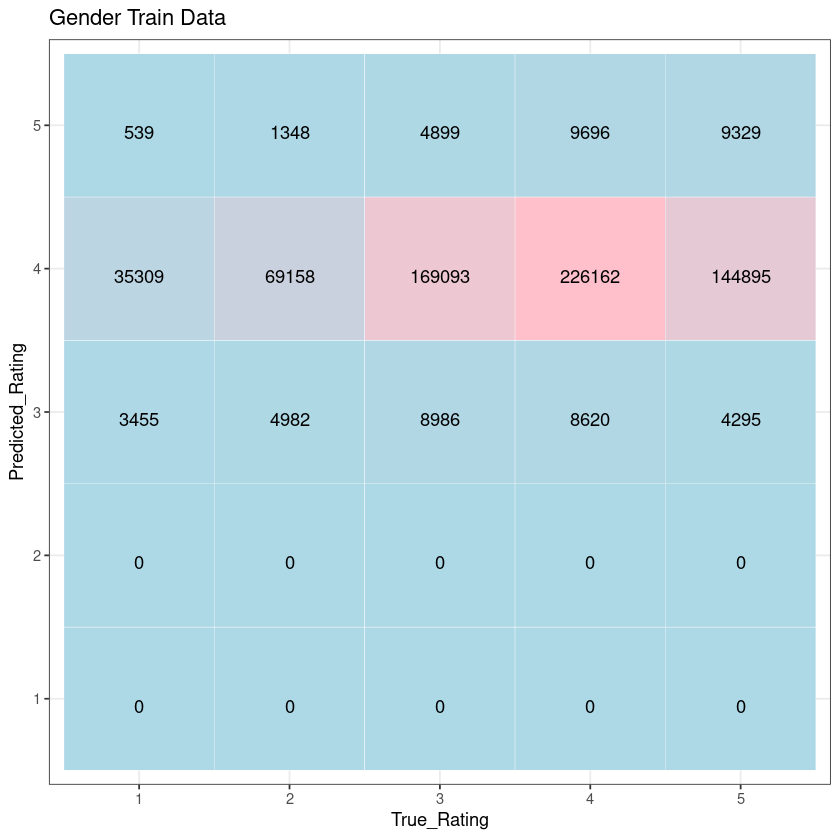

In [10]:
# graph train data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTrainGender[1],tabTrainGender[2],tabTrainGender[3],tabTrainGender[4],tabTrainGender[5],
            tabTrainGender[6],tabTrainGender[7],tabTrainGender[8],tabTrainGender[9],tabTrainGender[10],
            tabTrainGender[11],tabTrainGender[12],tabTrainGender[13],tabTrainGender[14],tabTrainGender[15],
            tabTrainGender[16],tabTrainGender[17],tabTrainGender[18],tabTrainGender[19],tabTrainGender[20],
            tabTrainGender[21],tabTrainGender[22],tabTrainGender[23],tabTrainGender[24],tabTrainGender[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Gender Train Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightblue", high = "pink") +
  theme_bw() + theme(legend.position = "none")

In [11]:
tabTrainGender[25]

[1] 9329

In [12]:
#Confusion Matrix testing
pGender <- predict(modelGender, testGender)
tabTestGender <- table(pGender, testGender$Rating)
tabTestGender
1-sum(diag(tabTestGender))/sum(tabTestGender)

       
pGender     1     2     3     4     5
      1     0     0     0     0     0
      2     0     0     0     0     0
      3  1490  2064  3981  3704  1812
      4 15166 29400 72114 96612 61823
      5   215   605  2124  4177  4156

[1] 0.6501872

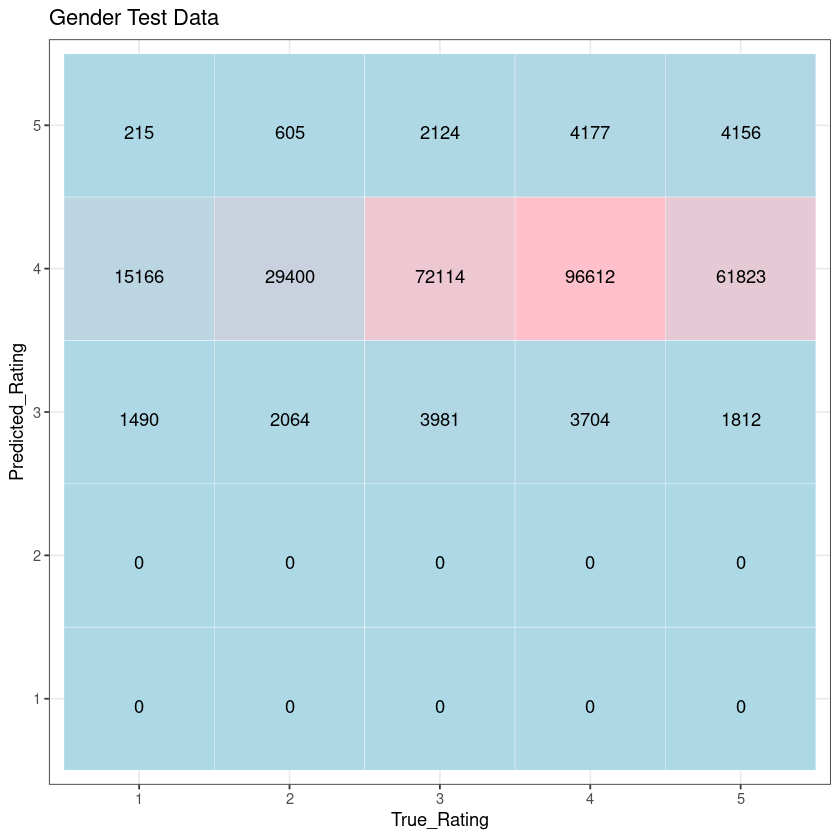

In [13]:
# graph test data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTestGender[1],tabTestGender[2],tabTestGender[3],tabTestGender[4],tabTestGender[5],
            tabTestGender[6],tabTestGender[7],tabTestGender[8],tabTestGender[9],tabTestGender[10],
            tabTestGender[11],tabTestGender[12],tabTestGender[13],tabTestGender[14],tabTestGender[15],
            tabTestGender[16],tabTestGender[17],tabTestGender[18],tabTestGender[19],tabTestGender[20],
            tabTestGender[21],tabTestGender[22],tabTestGender[23],tabTestGender[24],tabTestGender[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Gender Test Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightblue", high = "pink") +
  theme_bw() + theme(legend.position = "none")

In [14]:
# 2-tailed Z-test
summGender = summary(modelGender)
z <- summGender$coefficients/summGender$standard.errors
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),GenderM,Action1,Adventure1,Animation1,Children.s1,Comedy1,Crime1,Documentary1,Drama1,Fantasy1,Film.Noir1,Horror1,Musical1,Mystery1,Romance1,Sci.Fi1,Thriller1,War1,Western1
2,0,4.772707e-08,1.449591e-03,6.094304e-09,2.893374e-10,0,2.179610e-07,5.507556e-04,0.7884265761,0,7.593925e-14,4.021477e-06,0,3.927952e-03,2.094377e-04,0.000000e+00,2.320358e-01,0,0.07048466,4.470571e-02
3,0,3.045395e-04,8.881784e-16,2.220446e-16,0.000000e+00,0,3.409849e-03,4.346967e-12,0.0006577072,0,0.000000e+00,0.000000e+00,0,5.617729e-14,2.193011e-04,0.000000e+00,2.086390e-03,0,0.03178190,4.776667e-09
4,0,2.358290e-01,0.000000e+00,7.865375e-11,0.000000e+00,0,6.272964e-02,0.000000e+00,0.0000000000,0,0.000000e+00,0.000000e+00,0,0.000000e+00,5.526663e-04,0.000000e+00,5.862044e-11,0,0.00000000,4.440892e-16
5,0,6.340101e-03,0.000000e+00,1.113254e-10,0.000000e+00,0,8.394048e-01,0.000000e+00,0.0000000000,0,0.000000e+00,0.000000e+00,0,0.000000e+00,3.255977e-05,1.147926e-11,5.291073e-02,0,0.00000000,0.000000e+00


In [15]:
summGender

Call:
multinom(formula = Rating ~ ., data = trainGender)

Coefficients:
  (Intercept)     GenderM    Action1 Adventure1 Animation1 Children.s1
2   0.4574693  0.08105740 -0.0557022  0.1170137  0.2563319  -0.4090726
3   1.3268983  0.04781345 -0.1261671  0.1493874  0.6591400  -0.6054609
4   1.6077487  0.01537049 -0.2171308  0.1161013  0.9472919  -0.8532836
5   1.1082658 -0.03670477 -0.3313864  0.1211273  1.1762378  -1.0982206
      Comedy1     Crime1 Documentary1    Drama1  Fantasy1 Film.Noir1    Horror1
2 0.084219083 0.09281623    0.0248510 0.2980889 0.2551104  0.4043244 -0.3188063
3 0.042633272 0.16744928    0.2749287 0.5215916 0.2696415  0.8465894 -0.5633488
4 0.026603337 0.20767525    0.7718668 0.6959779 0.2708118  1.2986259 -0.7893649
5 0.003016729 0.35563968    1.1766916 0.8732661 0.3412348  1.7347035 -0.8414181
   Musical1  Mystery1  Romance1     Sci.Fi1 Thriller1        War1   Western1
2 0.1020335 0.1365914 0.2112989  0.02117007 0.2156867 -0.05678787 0.09491217
3 0.2348278 0.12364

## Age-Bracket

In [16]:
ageData <- allData[-c(2,4)]
str(ageData)


'data.frame':	1000209 obs. of  20 variables:
 $ Rating     : Factor w/ 5 levels "1","2","3","4",..: 5 3 3 4 5 3 5 5 4 4 ...
 $ Age.Bracket: Factor w/ 7 levels "18-24","25-34",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Action     : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 1 ...
 $ Adventure  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
 $ Animation  : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 1 ...
 $ Children.s : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 2 ...
 $ Comedy     : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 1 1 ...
 $ Crime      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Documentary: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Drama      : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 1 2 ...
 $ Fantasy    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Film.Noir  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Horror     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Musical    : Factor w/ 2 levels "0","1": 1 2 2

In [17]:
# split the data into 70% train and 30% test
ind <- sample(2, nrow(ageData), replace = TRUE, prob = c(0.7, 0.3))
trainAge <- ageData[ind==1,]
testAge <- ageData[ind==2,]

In [18]:
# ensure 1 star is the base rating and perform the regression
trainAge$Rating <- relevel(trainAge$Rating, ref="1")
modelAge <- multinom(Rating~., data = trainAge)

# weights:  130 (100 variable)
initial  value 1127416.085984 
iter  10 value 1034359.057547
iter  20 value 1033166.596007
iter  30 value 1032746.210530
iter  40 value 1029101.292323
iter  50 value 1022742.414649
iter  60 value 1012838.859250
iter  70 value 1009367.705051
iter  80 value 1008659.304749
iter  90 value 1006616.171334
iter 100 value 1005186.930952
final  value 1005186.930952 
stopped after 100 iterations


In [19]:
#Confusion Matrix training
pAge <- predict(modelAge, trainAge)
tabTrainAge <- table(pAge, trainAge$Rating)
tabTrainAge
1-sum(diag(tabTrainAge))/sum(tabTrainAge)

    
pAge      1      2      3      4      5
   1      1      0      0      4      1
   2      0      0      0      0      0
   3   7716  10879  20867  20796  10299
   4  30640  62286 155719 211539 135641
   5    871   1884   6439  12428  12493

[1] 0.6503941

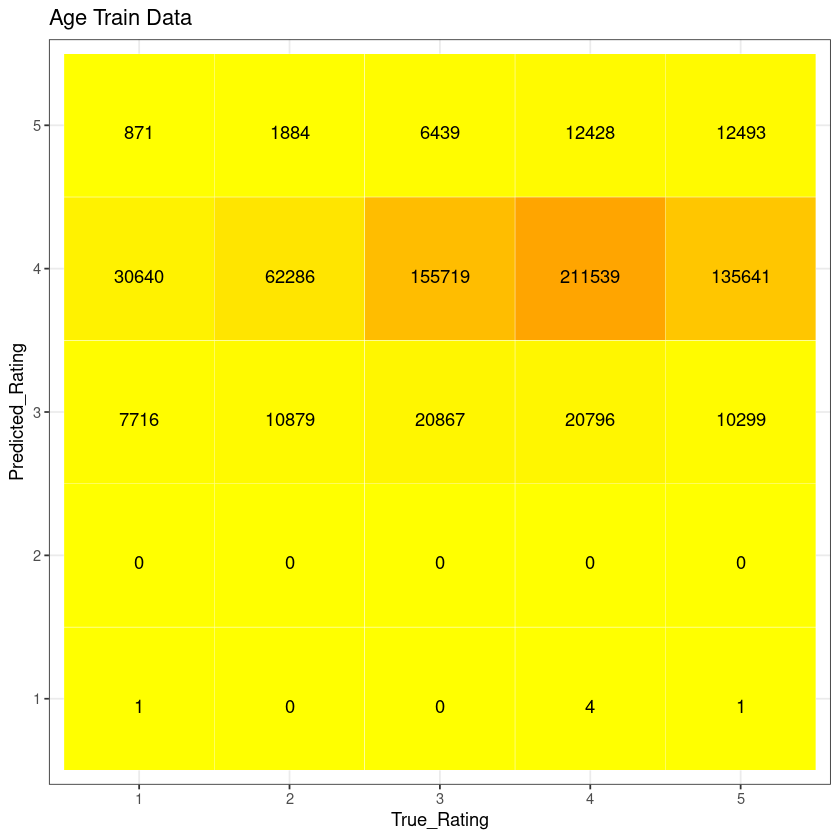

In [20]:
# graph train data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTrainAge[1],tabTrainAge[2],tabTrainAge[3],tabTrainAge[4],tabTrainAge[5],
            tabTrainAge[6],tabTrainAge[7],tabTrainAge[8],tabTrainAge[9],tabTrainAge[10],
            tabTrainAge[11],tabTrainAge[12],tabTrainAge[13],tabTrainAge[14],tabTrainAge[15],
            tabTrainAge[16],tabTrainAge[17],tabTrainAge[18],tabTrainAge[19],tabTrainAge[20],
            tabTrainAge[21],tabTrainAge[22],tabTrainAge[23],tabTrainAge[24],tabTrainAge[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Age Train Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "yellow", high = "orange") +
  theme_bw() + theme(legend.position = "none")

In [21]:
#Confusion Matrix testing
pAge <- predict(modelAge, testAge)
tabTestAge <- table(pAge, testAge$Rating)
tabTestAge
1-sum(diag(tabTestAge))/sum(tabTestAge)

    
pAge     1     2     3     4     5
   1     0     0     1     0     0
   2     0     0     0     0     0
   3  3285  4724  8873  8924  4383
   4 13303 26961 66596 89911 58143
   5   358   823  2702  5369  5350

[1] 0.6525462

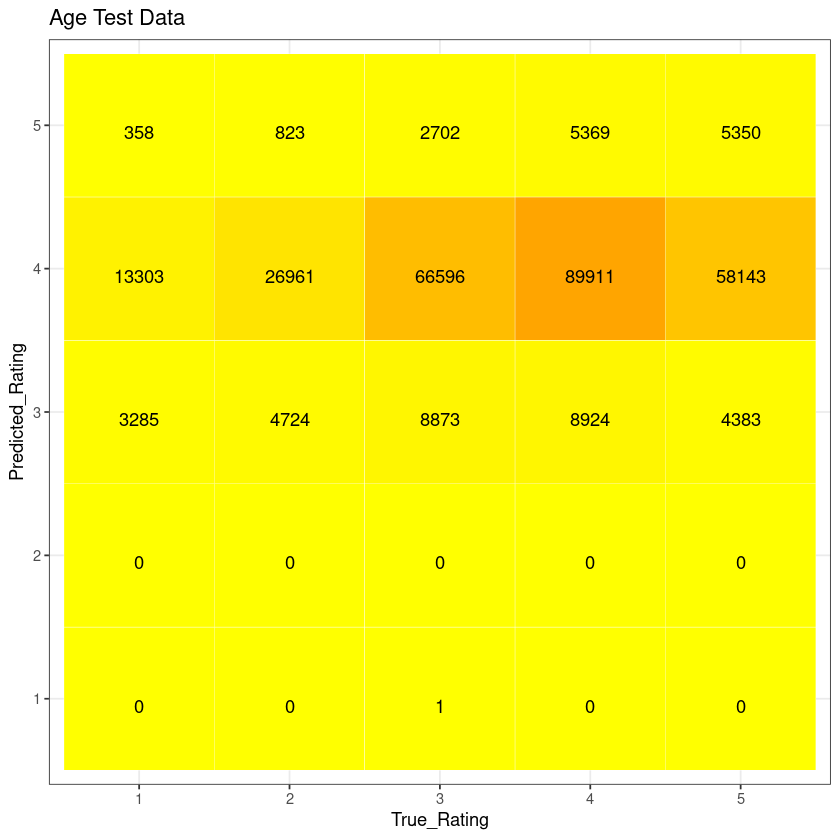

In [22]:
# graph test data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTestAge[1],tabTestAge[2],tabTestAge[3],tabTestAge[4],tabTestAge[5],
            tabTestAge[6],tabTestAge[7],tabTestAge[8],tabTestAge[9],tabTestAge[10],
            tabTestAge[11],tabTestAge[12],tabTestAge[13],tabTestAge[14],tabTestAge[15],
            tabTestAge[16],tabTestAge[17],tabTestAge[18],tabTestAge[19],tabTestAge[20],
            tabTestAge[21],tabTestAge[22],tabTestAge[23],tabTestAge[24],tabTestAge[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Age Test Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "yellow", high = "orange") +
  theme_bw() + theme(legend.position = "none")

In [23]:
# 2-tailed Z-test
summAge = summary(modelAge)
z <- summAge$coefficients/summAge$standard.errors
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),Age.Bracket25-34,Age.Bracket35-44,Age.Bracket45-49,Age.Bracket50-55,Age.Bracket56+,Age.BracketUnder 18,Action1,Adventure1,Animation1,⋯,Fantasy1,Film.Noir1,Horror1,Musical1,Mystery1,Romance1,Sci.Fi1,Thriller1,War1,Western1
2,0,7.657541e-11,0,0,0.002349869,0.06826348,1.989761e-02,9.014347e-01,7.638787e-03,2.456307e-05,⋯,3.042011e-14,3.129711e-07,0,0.05213209,7.073009e-01,0,3.180007e-09,0.000000e+00,1.017154e-04,1.317578e-02
3,0,0.000000e+00,0,0,0.000000000,0.00000000,6.079989e-09,7.342833e-03,1.328971e-08,0.000000e+00,⋯,1.515100e-02,6.614931e-12,0,0.05437270,1.890853e-09,0,0.000000e+00,1.305622e-13,5.974685e-08,9.840186e-01
4,0,0.000000e+00,0,0,0.000000000,0.00000000,2.858362e-03,1.227907e-13,4.716621e-04,0.000000e+00,⋯,0.000000e+00,0.000000e+00,0,0.00000000,1.873124e-05,0,0.000000e+00,0.000000e+00,6.971647e-09,1.261958e-05
5,0,0.000000e+00,0,0,0.000000000,0.00000000,1.083745e-03,0.000000e+00,7.329767e-07,0.000000e+00,⋯,1.705008e-08,0.000000e+00,0,0.00000000,4.317896e-08,0,3.330669e-15,0.000000e+00,0.000000e+00,0.000000e+00


In [24]:
summAge

Call:
multinom(formula = Rating ~ ., data = trainAge)

Coefficients:
  (Intercept) Age.Bracket25-34 Age.Bracket35-44 Age.Bracket45-49
2   0.4056415        0.1043553        0.3351512        0.4638522
3   1.2155972        0.1552919        0.4436602        0.4652691
4   1.3372657        0.1651120        0.5385512        0.5494045
5   0.8817044        0.1515259        0.4780437        0.4999720
  Age.Bracket50-55 Age.Bracket56+ Age.BracketUnder 18      Action1 Adventure1
2      -0.09122118    -0.07070369          0.08019236  0.002128606 0.05267626
3       0.41662881     0.31297097         -0.18295502 -0.041088988 0.09983982
4       0.53932252     0.49316817         -0.09151183 -0.111677202 0.06074753
5       0.62755709     0.54271304          0.10352154 -0.267126888 0.09024591
  Animation1 Children.s1      Comedy1      Crime1 Documentary1    Drama1
2  0.1645276  -0.4422680  0.007476287 -0.08033840    0.4001795 0.2526487
3  0.4942827  -0.4999365 -0.031500953  0.06687457    0.5107630 0.37935

## Occupation

In [25]:
jobData <- allData[-c(2,3)]
str(jobData)

'data.frame':	1000209 obs. of  20 variables:
 $ Rating     : Factor w/ 5 levels "1","2","3","4",..: 5 3 3 4 5 3 5 5 4 4 ...
 $ Occupation : Factor w/ 21 levels "academic/educator",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Action     : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 1 ...
 $ Adventure  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
 $ Animation  : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 1 ...
 $ Children.s : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 2 2 ...
 $ Comedy     : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 1 1 ...
 $ Crime      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Documentary: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Drama      : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 1 2 ...
 $ Fantasy    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Film.Noir  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Horror     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Musical    : Factor w/ 2 levels

In [26]:
# split the data into 70% train and 30% test
ind <- sample(2, nrow(jobData), replace = TRUE, prob = c(0.7, 0.3))
trainJob <- jobData[ind==1,]
testJob <- jobData[ind==2,]

In [27]:
# ensure 1 star is the base rating and perform the regression
trainJob$Rating <- relevel(trainJob$Rating, ref="1")
modelJob <- multinom(Rating~., data = trainJob)

# weights:  200 (156 variable)
initial  value 1127362.974533 
iter  10 value 1039158.756364
iter  20 value 1037732.712546
iter  30 value 1037236.992786
iter  40 value 1032338.742114
iter  50 value 1023558.098195
iter  60 value 1016261.442651
iter  70 value 1013900.487024
iter  80 value 1012052.789475
iter  90 value 1011383.434086
iter 100 value 1007450.530579
final  value 1007450.530579 
stopped after 100 iterations


In [28]:
#Confusion Matrix training
pJob <- predict(modelJob, trainJob)
tabTrainJob <- table(pJob, trainJob$Rating)
tabTrainJob
1-sum(diag(tabTrainJob))/sum(tabTrainJob)

    
pJob      1      2      3      4      5
   1     47     72    129    106     41
   2      0      0      0      0      0
   3   2195   2888   5058   4408   2275
   4  36796  72000 175495 235002 151019
   5    273    702   2319   4714   4931

[1] 0.6501806

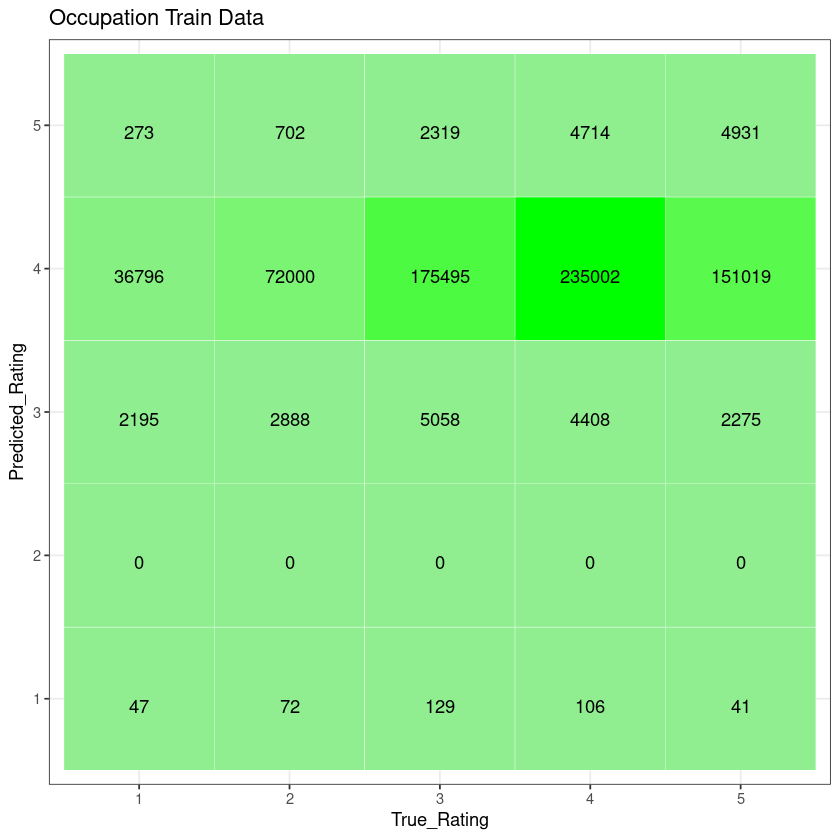

In [29]:
# graph train data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTrainJob[1],tabTrainJob[2],tabTrainJob[3],tabTrainJob[4],tabTrainJob[5],
            tabTrainJob[6],tabTrainJob[7],tabTrainJob[8],tabTrainJob[9],tabTrainJob[10],
            tabTrainJob[11],tabTrainJob[12],tabTrainJob[13],tabTrainJob[14],tabTrainJob[15],
            tabTrainJob[16],tabTrainJob[17],tabTrainJob[18],tabTrainJob[19],tabTrainJob[20],
            tabTrainJob[21],tabTrainJob[22],tabTrainJob[23],tabTrainJob[24],tabTrainJob[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Occupation Train Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightgreen", high = "green") +
  theme_bw() + theme(legend.position = "none")

In [30]:
#Confusion Matrix testing
pJob <- predict(modelJob, testJob)
tabTestJob <- table(pJob, testJob$Rating)
tabTestJob
1-sum(diag(tabTestJob))/sum(tabTestJob)

    
pJob      1      2      3      4      5
   1     24     23     53     55     28
   2      0      0      0      0      0
   3    995   1191   2129   1985    997
   4  15734  30394  75043 100750  64925
   5    110    287    971   1951   2094

[1] 0.6497052

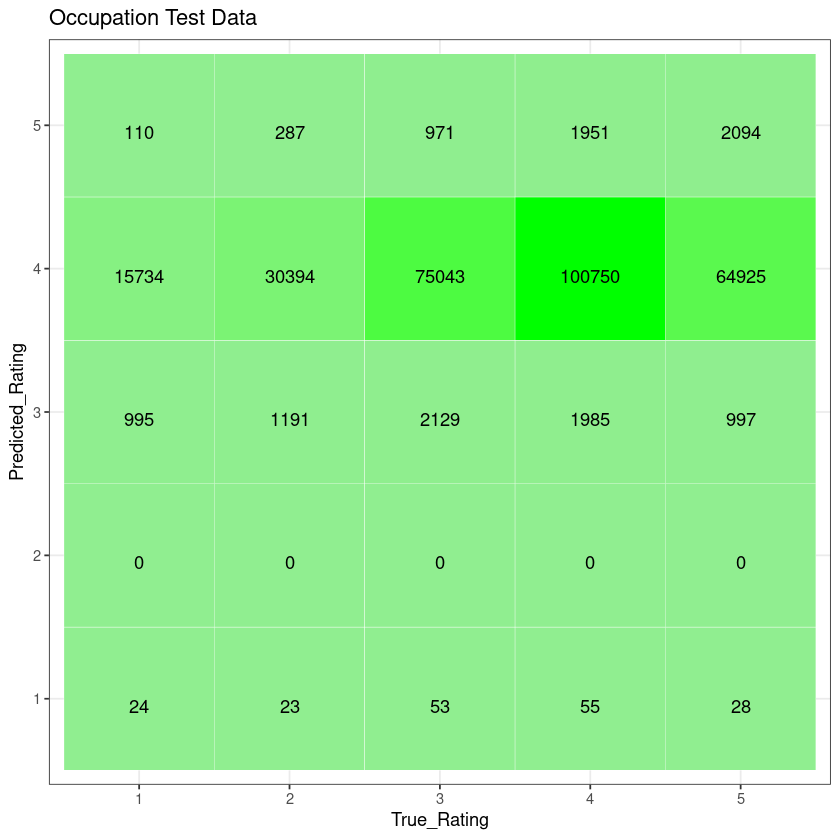

In [31]:
# graph test data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTestJob[1],tabTestJob[2],tabTestJob[3],tabTestJob[4],tabTestJob[5],
            tabTestJob[6],tabTestJob[7],tabTestJob[8],tabTestJob[9],tabTestJob[10],
            tabTestJob[11],tabTestJob[12],tabTestJob[13],tabTestJob[14],tabTestJob[15],
            tabTestJob[16],tabTestJob[17],tabTestJob[18],tabTestJob[19],tabTestJob[20],
            tabTestJob[21],tabTestJob[22],tabTestJob[23],tabTestJob[24],tabTestJob[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("Occupation Test Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "lightgreen", high = "green") +
  theme_bw() + theme(legend.position = "none")

In [32]:
# 2-tailed Z-test
summJob = summary(modelJob)
z <- summJob$coefficients/summJob$standard.errors
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),Occupationartist,Occupationclerical/admin,Occupationcollege/grad student,Occupationcustomer service,Occupationdoctor/health care,Occupationexecutive/managerial,Occupationfarmer,Occupationhomemaker,OccupationK-12 student,⋯,Fantasy1,Film.Noir1,Horror1,Musical1,Mystery1,Romance1,Sci.Fi1,Thriller1,War1,Western1
2,0.0001472024,1.862673e-05,0,4.884981e-14,0,3.989107e-10,0,0,2.711840e-01,6.598626e-04,⋯,5.251407e-02,0.04882355,0,0,1.438977e-04,0.000000e+00,2.106114e-02,0,7.203921e-06,2.131233e-05
3,0.0000000000,2.560169e-05,0,2.051991e-04,0,1.397493e-07,0,0,6.658299e-07,1.921132e-09,⋯,8.751297e-04,0.00000000,0,0,0.000000e+00,0.000000e+00,1.524313e-01,0,2.682513e-01,3.677156e-02
4,0.0000000000,3.969818e-03,0,1.210571e-01,0,0.000000e+00,0,0,1.216733e-09,5.004652e-10,⋯,1.292003e-04,0.00000000,0,0,0.000000e+00,0.000000e+00,7.012294e-01,0,0.000000e+00,3.321244e-03
5,0.0000000000,8.198751e-07,0,5.396261e-11,0,0.000000e+00,0,0,4.775513e-09,4.037126e-03,⋯,9.103829e-15,0.00000000,0,0,5.551115e-15,4.421574e-12,1.474926e-07,0,0.000000e+00,1.085798e-11


In [33]:
summJob

Call:
multinom(formula = Rating ~ ., data = trainJob)

Coefficients:
  (Intercept) Occupationartist Occupationclerical/admin
2   0.1008323        0.1453160                0.6330360
3   1.1150737        0.1226995                0.5872277
4   1.3546967        0.0820288                0.6334686
5   0.7269631        0.1484950                0.7981984
  Occupationcollege/grad student Occupationcustomer service
2                     0.19627163                  0.6938405
3                     0.08314794                  0.8431918
4                     0.03388247                  0.6832605
5                     0.15202582                  0.7668490
  Occupationdoctor/health care Occupationexecutive/managerial Occupationfarmer
2                    0.2453111                      0.3617819       -1.3112682
3                    0.1794160                      0.3452965       -0.9669321
4                    0.3240210                      0.3165370       -1.1825392
5                    0.3855636     

## All Data

In [13]:
str(allData)

'data.frame':	1000209 obs. of  22 variables:
 $ Rating     : int  5 3 3 4 5 3 5 5 4 4 ...
 $ Gender     : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age.Bracket: Factor w/ 7 levels "18-24","25-34",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Occupation : Factor w/ 21 levels "academic/educator",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Action     : int  0 0 0 0 0 1 1 0 0 0 ...
 $ Adventure  : int  0 0 0 0 0 1 1 0 0 1 ...
 $ Animation  : int  0 1 0 0 1 0 0 0 1 0 ...
 $ Children.s : int  0 1 0 0 1 0 0 0 1 1 ...
 $ Comedy     : int  0 0 0 0 1 1 0 1 0 0 ...
 $ Crime      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Documentary: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Drama      : int  1 0 0 1 0 0 1 1 0 1 ...
 $ Fantasy    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Film.Noir  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Horror     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Musical    : int  0 1 1 0 0 0 0 0 1 1 ...
 $ Mystery    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Romance    : int  0 0 1 0 0 1 0 0 0 0 ...
 $ Sci.Fi     : int  0 0 0 0 0 0 0 0 0 

In [14]:
# split the data into 70% train and 30% test
ind <- sample(2, nrow(allData), replace = TRUE, prob = c(0.7, 0.3))
trainAll <- allData[ind==1,]
testAll <- allData[ind==2,]

In [15]:
# perform the regression
modelAll <- multinom(Rating~., data = trainAll)

# weights:  235 (184 variable)
initial  value 1126625.851969 
iter  10 value 1023638.557923
iter  20 value 1021571.805842
iter  30 value 1021101.964435
iter  40 value 1020668.449481
iter  50 value 1019005.250069
iter  60 value 1017719.157799
iter  70 value 1013606.598660
iter  80 value 1010316.738468
iter  90 value 1006931.227671
iter 100 value 1006186.556999
final  value 1006186.556999 
stopped after 100 iterations


In [16]:
#Confusion Matrix training
pAll <- predict(modelAll, trainAll)
tabTrainAll <- table(pAll, trainAll$Rating)
tabTrainAll
1-sum(diag(tabTrainAll))/sum(tabTrainAll)

    
pAll      1      2      3      4      5
   1      7     17     28     27     22
   2      0      0      0      0      0
   3   2021   2945   5589   5548   3183
   4  36700  70925 172717 229370 145640
   5    570   1371   4754   9090   9488

[1] 0.650786

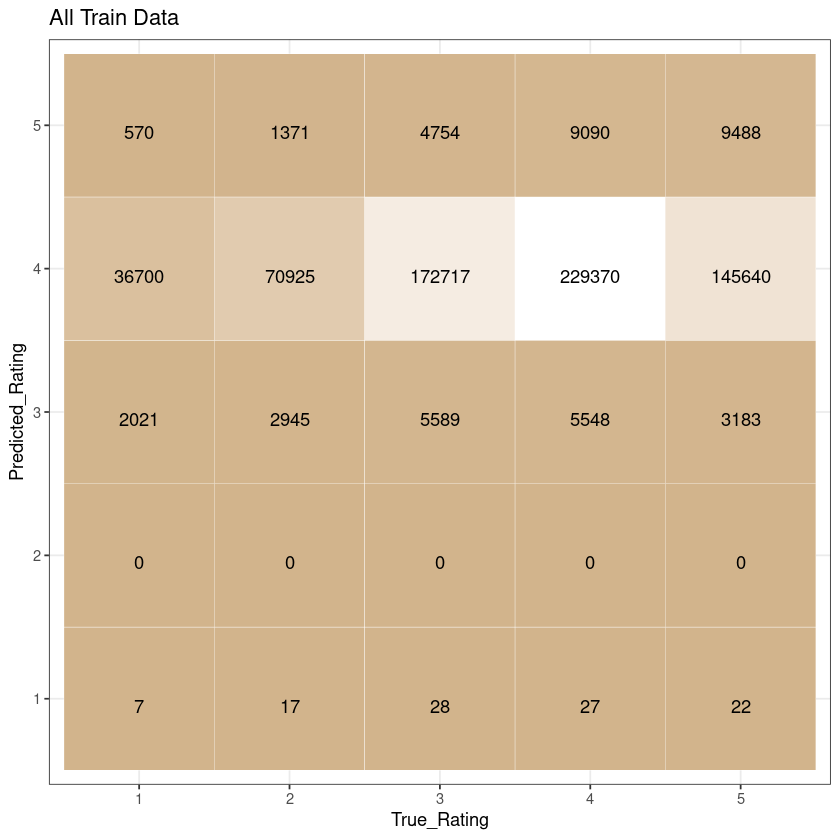

In [17]:
# graph train data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTrainAll[1],tabTrainAll[2],tabTrainAll[3],tabTrainAll[4],tabTrainAll[5],
            tabTrainAll[6],tabTrainAll[7],tabTrainAll[8],tabTrainAll[9],tabTrainAll[10],
            tabTrainAll[11],tabTrainAll[12],tabTrainAll[13],tabTrainAll[14],tabTrainAll[15],
            tabTrainAll[16],tabTrainAll[17],tabTrainAll[18],tabTrainAll[19],tabTrainAll[20],
            tabTrainAll[21],tabTrainAll[22],tabTrainAll[23],tabTrainAll[24],tabTrainAll[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("All Train Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "tan", high = "white") +
  theme_bw() + theme(legend.position = "none")

In [18]:
#Confusion Matrix testing
pAll <- predict(modelAll, testAll)
tabTestAll <- table(pAll, testAll$Rating)
tabTestAll
1-sum(diag(tabTestAll))/sum(tabTestAll)

    
pAll     1     2     3     4     5
   1     5     8    12    17    10
   2     0     0     0     0     0
   3   881  1271  2386  2484  1340
   4 15732 30432 73650 98529 62575
   5   258   588  2061  3906  4052

[1] 0.650323

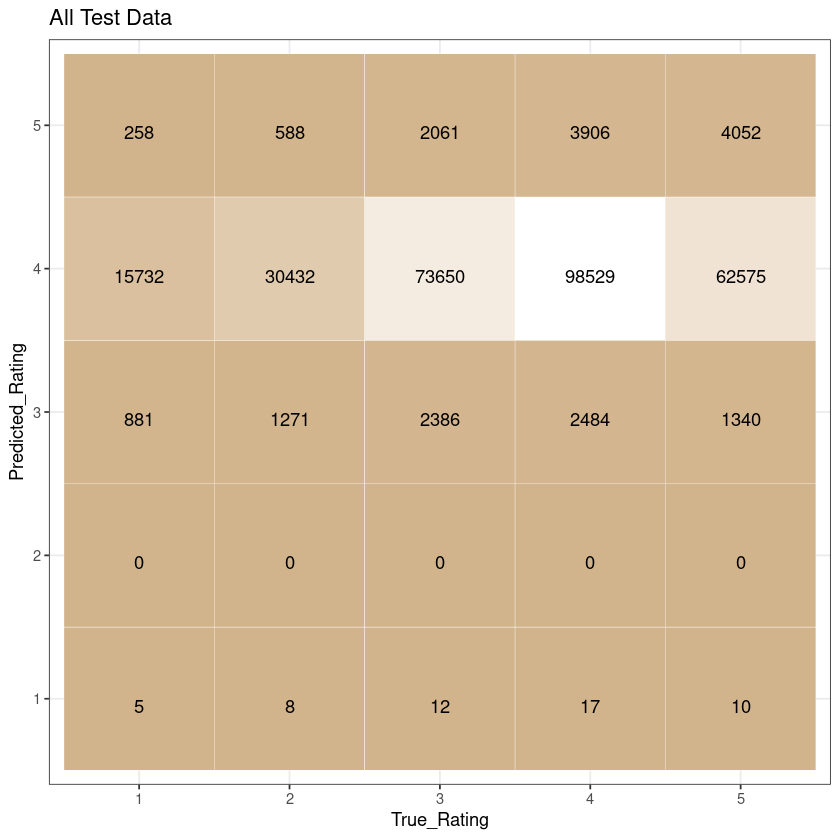

In [22]:
# graph test data confusion matrix
True_Rating <- factor(c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5))
Predicted_Rating <- factor(c(1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5))
Y      <- c(tabTestAll[1],tabTestAll[2],tabTestAll[3],tabTestAll[4],tabTestAll[5],
            tabTestAll[6],tabTestAll[7],tabTestAll[8],tabTestAll[9],tabTestAll[10],
            tabTestAll[11],tabTestAll[12],tabTestAll[13],tabTestAll[14],tabTestAll[15],
            tabTestAll[16],tabTestAll[17],tabTestAll[18],tabTestAll[19],tabTestAll[20],
            tabTestAll[21],tabTestAll[22],tabTestAll[23],tabTestAll[24],tabTestAll[25])
df <- data.frame(True_Rating, Predicted_Rating, Y)

library(ggplot2)
ggplot(data =  df, mapping = aes(x = True_Rating, y = Predicted_Rating)) +
  ggtitle("All Test Data") +
  geom_tile(aes(fill = Y), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Y)), vjust = 1) +
  scale_fill_gradient(low = "tan", high = "white") +
  theme_bw() + theme(legend.position = "none")

In [20]:
# 2-tailed Z-test
summAll = summary(modelAll)
z <- summAll$coefficients/summAll$standard.errors
p <- (1 - pnorm(abs(z), 0, 1)) * 2
p

,(Intercept),GenderM,Age.Bracket25-34,Age.Bracket35-44,Age.Bracket45-49,Age.Bracket50-55,Age.Bracket56+,Age.BracketUnder 18,Occupationartist,Occupationclerical/admin,⋯,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
2,0,0.000000e+00,0.952239352,1.506950e-11,0,0.004218026,7.271901e-01,2.105205e-12,0.000000e+00,0.000000e+00,⋯,7.329310e-03,0,0,0.009771706,0.000000e+00,0,2.759605e-05,1.27627e-07,0.0000000000,7.637150e-04
3,0,8.721912e-13,0.001144843,2.220446e-16,0,0.000000000,2.309264e-14,1.716017e-07,2.198242e-14,1.163288e-05,⋯,1.988609e-05,0,0,0.000940772,1.606648e-11,0,4.551550e-01,0.00000e+00,0.0002989596,5.872523e-07
4,0,0.000000e+00,0.020666724,0.000000e+00,0,0.000000000,0.000000e+00,1.522701e-04,0.000000e+00,1.228322e-08,⋯,1.624873e-04,0,0,0.426256197,9.285480e-04,0,3.879062e-02,0.00000e+00,0.0000000000,9.235847e-06
5,0,2.303573e-03,0.147132334,0.000000e+00,0,0.000000000,0.000000e+00,1.040566e-03,1.131504e-10,4.218095e-01,⋯,5.679901e-12,0,0,0.000000000,2.430843e-02,0,3.367155e-01,0.00000e+00,0.0000000000,1.776357e-15


In [21]:
summAll

Call:
multinom(formula = Rating ~ ., data = trainAll)

Coefficients:
  (Intercept)    GenderM Age.Bracket25-34 Age.Bracket35-44 Age.Bracket45-49
2   0.4760289 0.17576963     -0.001131606        0.1562032        0.2642603
3   1.3229348 0.09763466     -0.054724618        0.1698304        0.3890210
4   1.5998126 0.13057144      0.038055000        0.2812842        0.4201625
5   0.9810925 0.04239933     -0.025085711        0.2814525        0.3072834
  Age.Bracket50-55 Age.Bracket56+ Age.BracketUnder 18 Occupationartist
2       0.09590713     0.01611185          -0.4171992       -0.3934060
3       0.41276975     0.30787871          -0.2621539       -0.2407715
4       0.43381996     0.52406452          -0.1853581       -0.3144990
5       0.53809842     0.49844382          -0.1693248       -0.2085698
  Occupationclerical/admin Occupationcollege/grad student
2              -0.36185799                    -0.10087518
3              -0.16451176                    -0.21681781
4              -0.2089